In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('1. Weather Data.csv') 
print(df)

             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa         

In [96]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [97]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [98]:
df.shape

(8784, 8)

In [99]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [100]:
#checking for missing values before I decide what to do with them
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [101]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
# Number of duplicate rows
num_duplicates = duplicate_rows.sum()
# Display duplicate rows
duplicates = df[duplicate_rows]
print(duplicates)

Empty DataFrame
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather]
Index: []


In [102]:
#Separating numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(numeric_cols)
print(non_numeric_cols)

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa'],
      dtype='object')
Index(['Date/Time', 'Weather'], dtype='object')


In [103]:
#Perfoming statistical analysis on numeric columns
mean_values = df[numeric_cols].mean()
median_values = df[numeric_cols].median()
std_dev = df[numeric_cols].std()
print(mean_values)
print(median_values)
print(std_dev)

Temp_C                8.798144
Dew Point Temp_C      2.555294
Rel Hum_%            67.431694
Wind Speed_km/h      14.945469
Visibility_km        27.664447
Press_kPa           101.051623
dtype: float64
Temp_C                9.30
Dew Point Temp_C      3.30
Rel Hum_%            68.00
Wind Speed_km/h      13.00
Visibility_km        25.00
Press_kPa           101.07
dtype: float64
Temp_C              11.687883
Dew Point Temp_C    10.883072
Rel Hum_%           16.918881
Wind Speed_km/h      8.688696
Visibility_km       12.622688
Press_kPa            0.844005
dtype: float64


In [104]:
# Apply IQR to numeric columns only
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
print(df[numeric_cols][outliers_iqr.any(axis=1)])

      Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0       -1.8              -3.9         86                4            8.0   
1       -1.8              -3.7         87                4            8.0   
2       -1.8              -3.4         89                7            4.0   
3       -1.5              -3.2         88                6            4.0   
4       -1.5              -3.3         88                7            4.8   
...      ...               ...        ...              ...            ...   
8779     0.1              -2.7         81               30            9.7   
8780     0.2              -2.4         83               24            9.7   
8781    -0.5              -1.5         93               28            4.8   
8782    -0.2              -1.8         89               28            9.7   
8783     0.0              -2.1         86               30           11.3   

      Press_kPa  
0        101.24  
1        101.24  
2        101.26  
3  

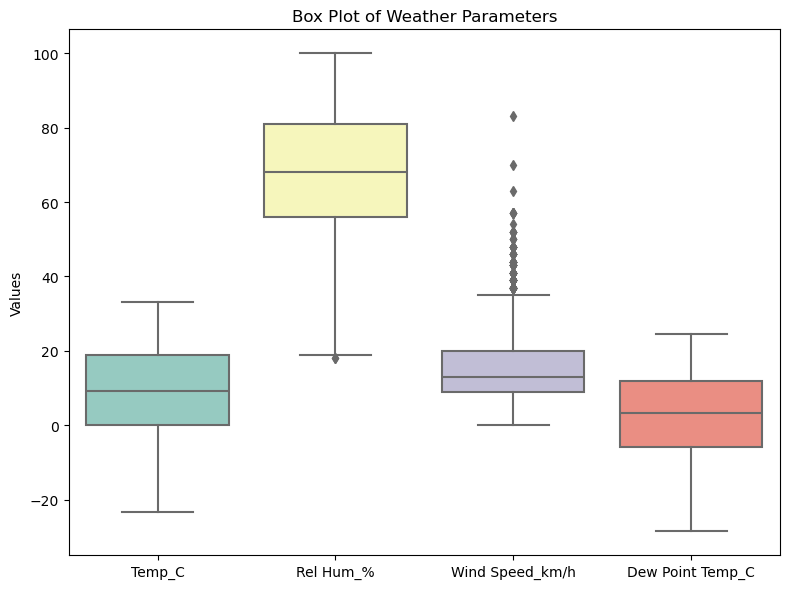

In [127]:
plt.figure(figsize=(8, 6))
columns_to_plot = ['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h','Dew Point Temp_C']
sns.boxplot(data=df[columns_to_plot], palette="Set3")
plt.title('Box Plot of Weather Parameters')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

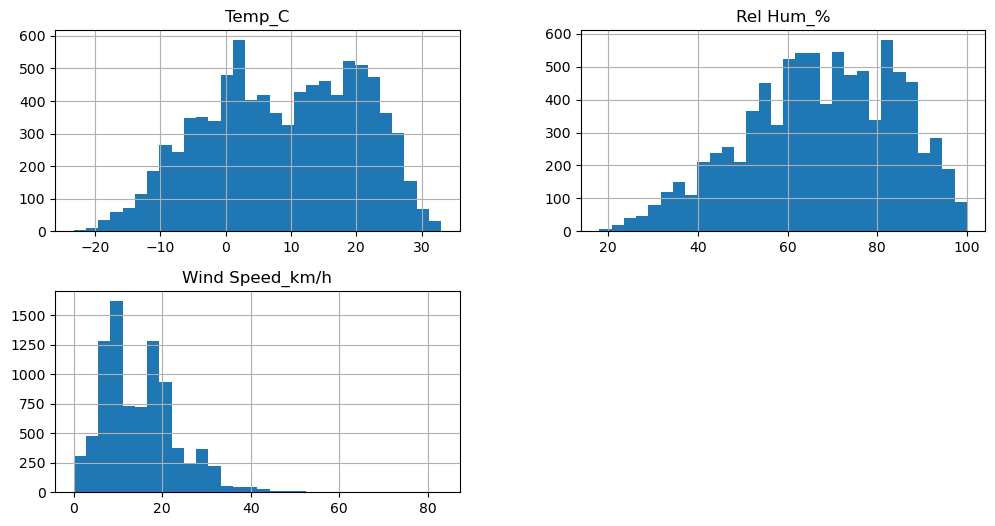

In [105]:
df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']].hist(bins=30, figsize=(12, 6))
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


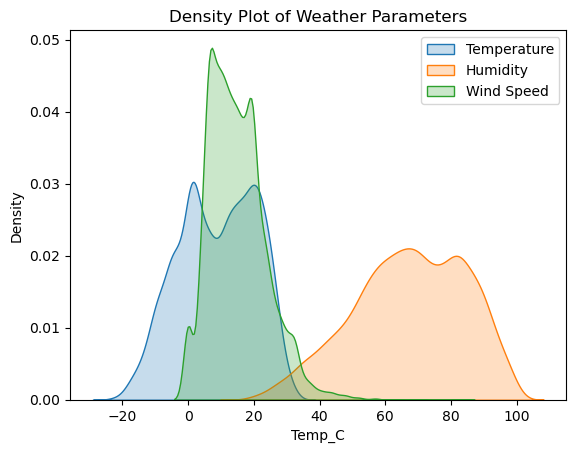

In [106]:
sns.kdeplot(df['Temp_C'], label='Temperature', fill=True)
sns.kdeplot(df['Rel Hum_%'], label='Humidity', fill=True)
sns.kdeplot(df['Wind Speed_km/h'], label='Wind Speed', fill=True)
plt.title('Density Plot of Weather Parameters')
plt.legend()
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

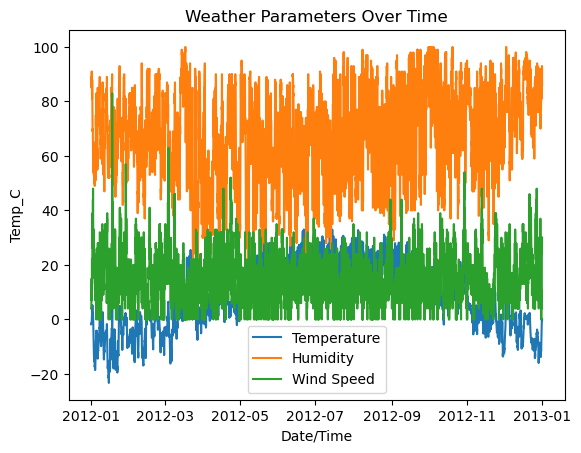

In [107]:
#Line plots to observe trends and patterns over time
# Convert date column to datetime if it's not already
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Plotting time series
sns.lineplot(data=df, x='Date/Time', y='Temp_C', label='Temperature')
sns.lineplot(data=df, x='Date/Time', y='Rel Hum_%', label='Humidity')
sns.lineplot(data=df, x='Date/Time', y='Wind Speed_km/h', label='Wind Speed')
plt.title('Weather Parameters Over Time')
plt.legend()
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

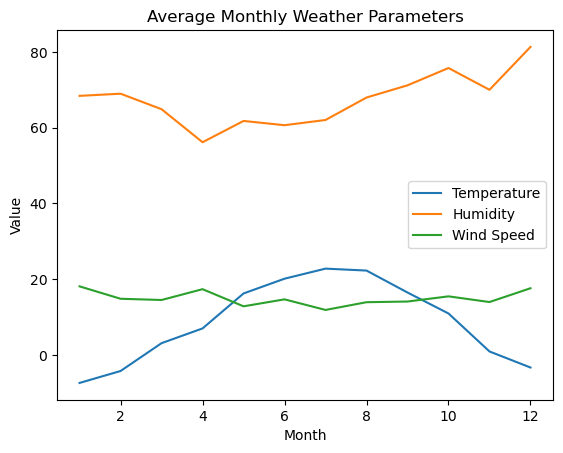

In [121]:
df['Temp_C'] = pd.to_numeric(df['Temp_C'], errors='coerce')
df['Rel Hum_%'] = pd.to_numeric(df['Rel Hum_%'], errors='coerce')
df['Wind Speed_km/h'] = pd.to_numeric(df['Wind Speed_km/h'], errors='coerce')
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['month'] = df['Date/Time'].dt.month
df['year'] = df['Date/Time'].dt.year
monthly_avg = df.groupby('month').agg({
    'Temp_C': 'mean',
    'Rel Hum_%': 'mean',
    'Wind Speed_km/h': 'mean'
})
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='Temp_C', label='Temperature')
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='Rel Hum_%', label='Humidity')
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='Wind Speed_km/h', label='Wind Speed')
plt.title('Average Monthly Weather Parameters')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

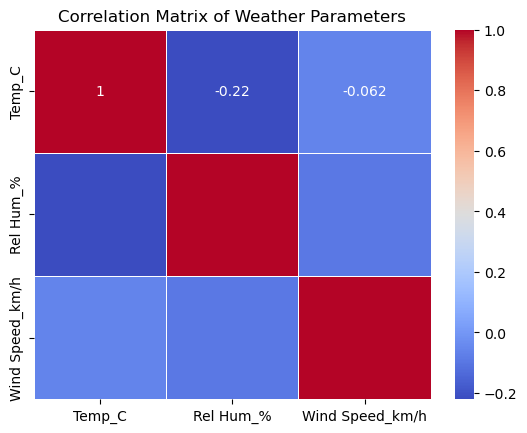

In [110]:
# Correlation matrix
corr_matrix = df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

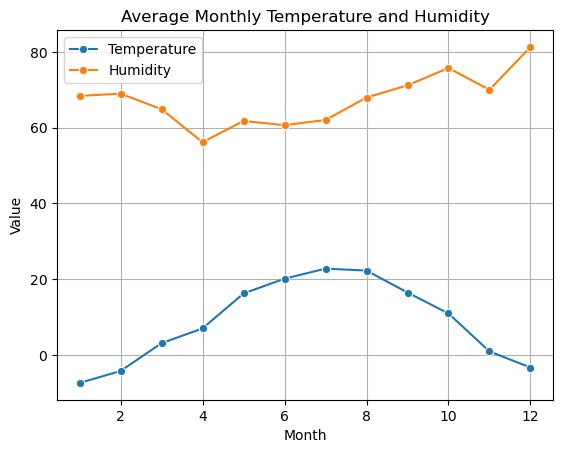

In [111]:
#temperature and humidity across months to identify seasonal patterns
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='Temp_C', label='Temperature', marker='o')
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='Rel Hum_%', label='Humidity', marker='o')
plt.title('Average Monthly Temperature and Humidity')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

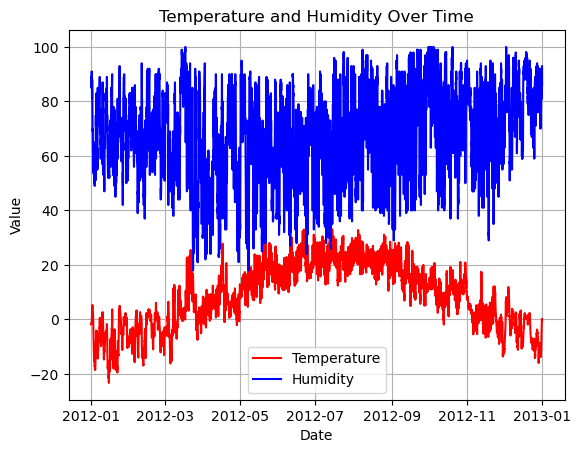

In [112]:
#time series for temperature and humidity to visualize any unusual spikes or drops
plt.plot(df['Date/Time'], df['Temp_C'], label='Temperature', color='r')
plt.plot(df['Date/Time'], df['Rel Hum_%'], label='Humidity', color='b')
plt.title('Temperature and Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

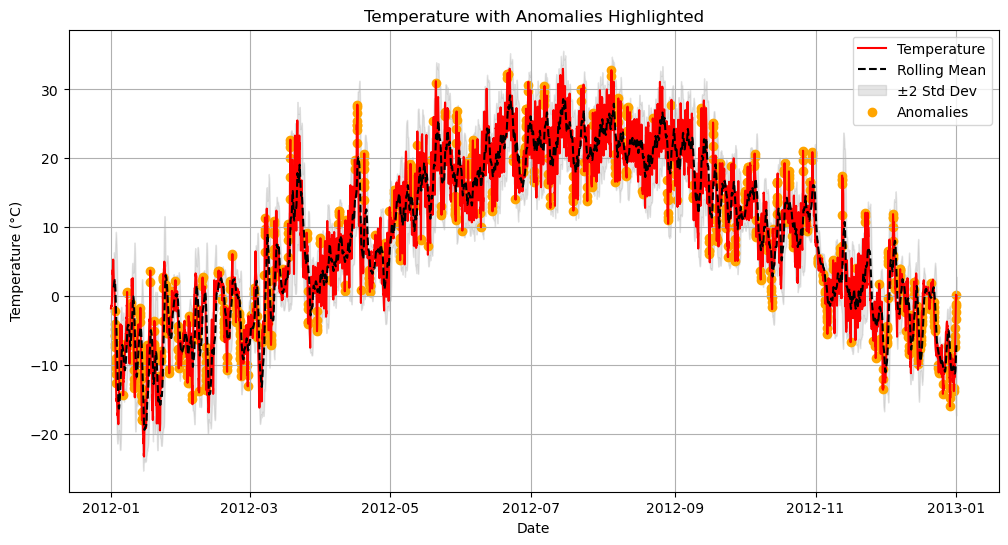

In [117]:
rolling_temp_mean = df['Temp_C'].rolling(window=30).mean()
rolling_temp_std = df['Temp_C'].rolling(window=30).std()
anomalies_temp = (df['Temp_C'] > (rolling_temp_mean + 2 * rolling_temp_std)) | (df['Temp_C'] < (rolling_temp_mean - 2 * rolling_temp_std))

plt.figure(figsize=(12, 6))
plt.plot(df['Date/Time'], df['Temp_C'], label='Temperature', color='r')
plt.plot(df['Date/Time'], rolling_temp_mean, label='Rolling Mean', color='k', linestyle='--')
plt.fill_between(df['Date/Time'], rolling_temp_mean - 2 * rolling_temp_std, rolling_temp_mean + 2 * rolling_temp_std, color='gray', alpha=0.2, label='±2 Std Dev')
plt.scatter(df.loc[anomalies_temp, 'Date/Time'], df.loc[anomalies_temp, 'Temp_C'], color='orange', label='Anomalies')
plt.title('Temperature with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()